In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\DEVI\Downloads\Sem 6\FOML\FOML-Materials\House Pricing dataset with code for end-end project in ML - Unit 1\housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


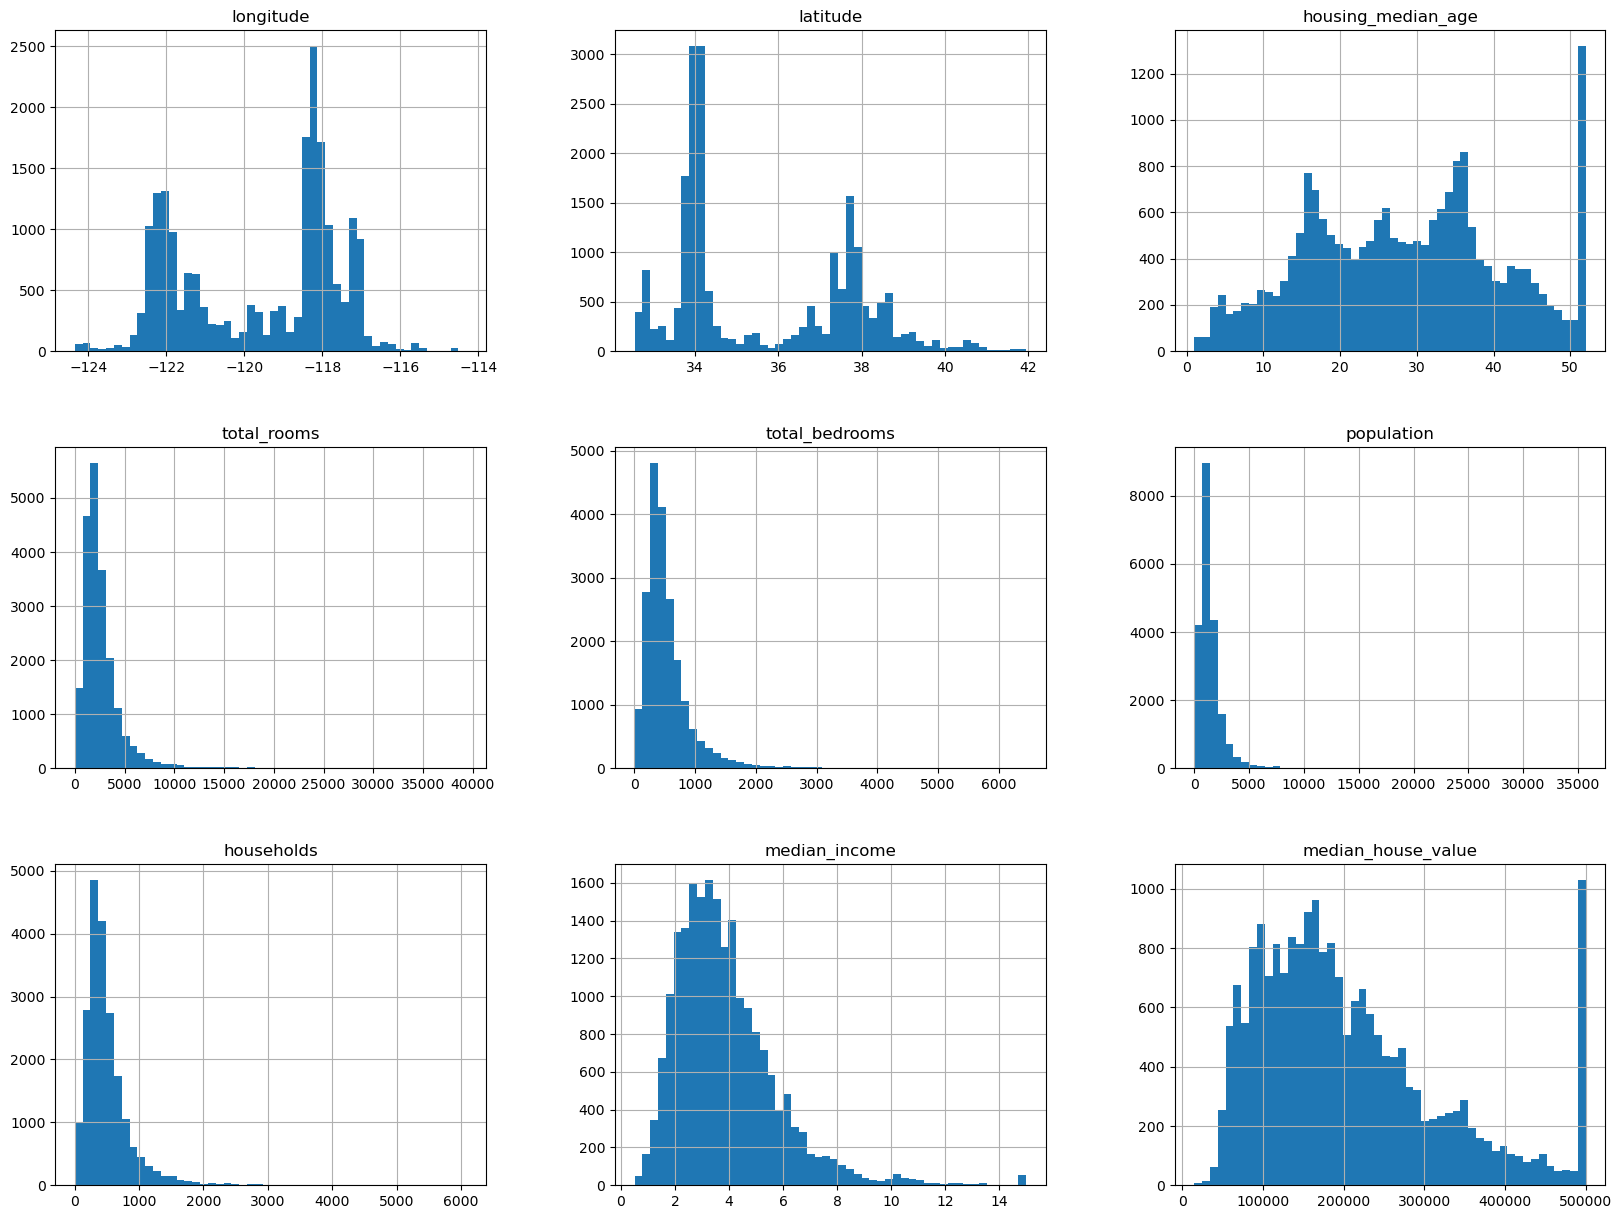

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Training Set Size:", len(train_set))
print("Testing Set Size:", len(test_set))

Training Set Size: 16512
Testing Set Size: 4128


<Axes: xlabel='longitude', ylabel='latitude'>

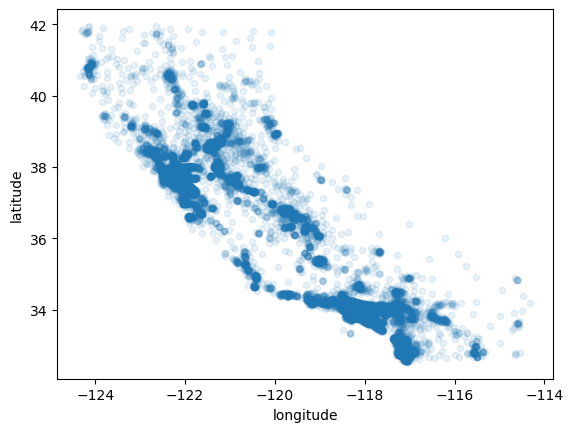

In [5]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [16]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [6]:
from sklearn.model_selection import train_test_split
y = df["median_house_value"]
x = df["median_income"]

x_train, y_train,x_test,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [7]:
# Splitting features and target variable
X = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"]

# Handling categorical variables if present
X = pd.get_dummies(X)

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lr = lin_reg.predict(X)

print("Linear Regression:")
print("RMSE:", mean_squared_error(y, y_pred_lr, squared=False))
print("R2 Score:", r2_score(y, y_pred_lr))
print("-" * 50)



Linear Regression:
RMSE: 68433.93736666226
R2 Score: 0.6496648627123223
--------------------------------------------------


Text(0, 0.5, 'Predicted Prices')

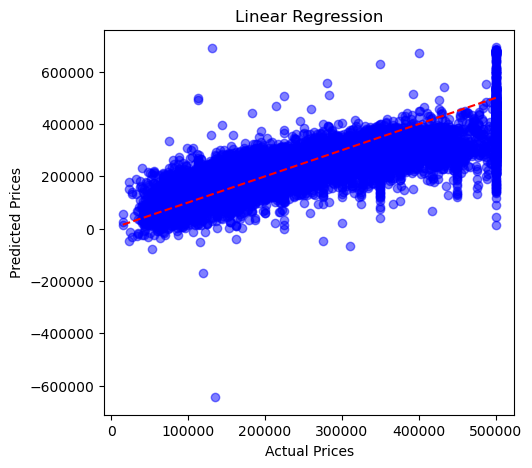

In [9]:
# Plotting the results
plt.figure(figsize=(18, 5))

# Plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


In [8]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)
y_pred_tree = tree_reg.predict(X)

print("Decision Tree Regressor:")
print("RMSE:", mean_squared_error(y, y_pred_tree, squared=False))
print("R2 Score:", r2_score(y, y_pred_tree))
print("-" * 50)

Decision Tree Regressor:
RMSE: 0.0
R2 Score: 1.0
--------------------------------------------------


Text(0, 0.5, 'Predicted Prices')

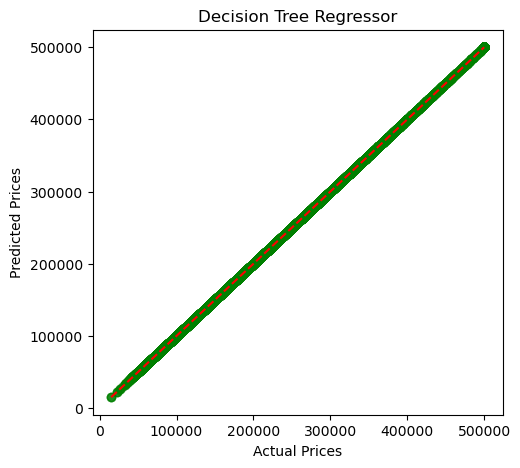

In [10]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(y, y_pred_tree, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Decision Tree Regressor')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

In [13]:
# Support Vector Regressor
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear')
svr_reg.fit(X, y)
y_pred_svr = svr_reg.predict(X)

print("Support Vector Regressor:")
print("RMSE:", mean_squared_error(y, y_pred_svr, squared=False))
print("R2 Score:", r2_score(y, y_pred_svr))

Support Vector Regressor:
RMSE: 93012.7067908877
R2 Score: 0.3528198209494432


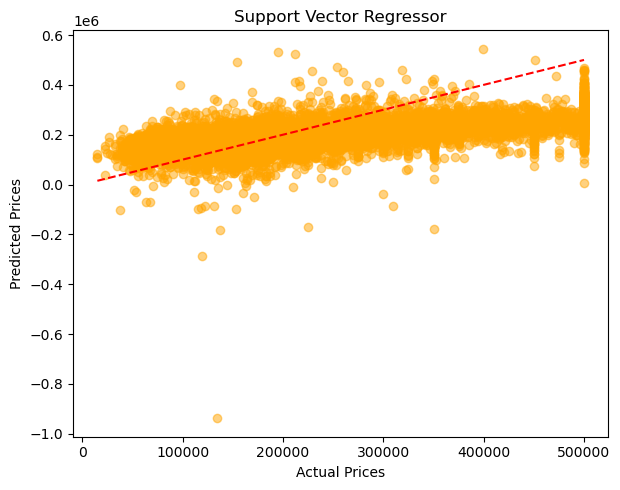

In [14]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred_svr, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Support Vector Regressor')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()